# 따릉이 대여량 예측 경진대회 EDA

이번 대회는 주어진 일기 예보 데이터를 이용하여 따릉이 대여량을 예측하는 대회입니다.

일기 예보 데이터에는 풍향(wind_direction), 하늘 상태(sky_condition), 강수 형태(precipitation_form), 풍속(wind_speed), 습도(humidity), 최저기온(low_temp), 최고기온(high_tmep), 강수확률(Precipitation_probability)가 있습니다.

위의 데이터들이 당일 따릉이 대여량(nunber_of_rentals)와 어떠한 관계를 갖는지 알아보는 것이 중요합니다.

시작해볼까요?

# 데이터 불러오기 전처리

## 데이터 불러오기

먼저 주어진 데이터를 불러오고 확인합니다.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

bicycle = pd.read_csv('data/train.csv')
bicycle

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833
...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053


In [4]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


## 데이터 결측치 확인 
데이터에 결측치가 있는지 확인합니다.

In [5]:
def check_missing_col(dataframe):
    counted_missing_col = 0
    for i, col in enumerate(bicycle.columns):
        missing_values = sum(bicycle[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'총 {missing_values}개의 결측치가 존재합니다.')

        if i == len(bicycle.columns) - 1 and counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')

check_missing_col(bicycle)

결측치가 존재하지 않습니다


## date_time 날짜 처리

데이터를 살펴보면 date_time이 날짜 형식으로 되어있는 것을 확인할 수 있습니다.

이 상태로는 문자열로 취급되어 제대로 된 분석이 불가능합니다.

분석하기 쉽도록 각각 년, 월, 일로 나누어 보겠습니다

In [6]:
def seperate_datetime(dataframe):
    year = []
    month = []
    day = []

    for date in dataframe.date_time:
        year_point, month_point, day_point = date.split('-') # - 기준으로 string을 나누고 list로 만듦 ex) '2016-04-01' -> ['2016', '04', '01']
        year.append(int(year_point))
        month.append(int(month_point))
        day.append(int(day_point))
    return year, month, day

year, month, day = seperate_datetime(bicycle)
    
bicycle['year'] = year
bicycle['month'] = month
bicycle['day'] = day

bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


# 데이터 기초 통계 분석

이제 데이터의 통계치를 알아보겠습니다.

pandas의 DataFrame은 describe이라는 메소드를 갖고있는데요 이를 통해 각 컬럼의 평균값, 최대치, 최소치, 편차 등을 알 수 있습니다.

In [7]:
data_description = bicycle.describe()
data_description

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
count,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000,273.000000
mean,202.750967,2.288256,0.100963,2.480963,56.745491,13.795249,23.384733,16.878103,59574.978022,2019.000000,5.000000,15.670330
std,56.659232,0.961775,0.203193,0.884397,12.351268,5.107711,5.204605,16.643772,27659.575774,0.817996,0.813489,8.774195
min,57.047000,1.000000,0.000000,0.753000,24.831000,1.938000,9.895000,0.000000,1037.000000,2018.000000,4.000000,1.000000
25%,171.541000,1.405000,0.000000,1.820000,47.196000,9.938000,19.842000,4.054000,36761.000000,2018.000000,4.000000,8.000000
50%,209.774000,2.167000,0.000000,2.411000,55.845000,14.375000,24.158000,12.162000,63032.000000,2019.000000,5.000000,16.000000
75%,238.412000,3.000000,0.088000,2.924000,66.419000,18.000000,27.526000,22.973000,81515.000000,2020.000000,6.000000,23.000000
max,321.622000,4.000000,1.000000,5.607000,88.885000,22.312000,33.421000,82.162000,110377.000000,2020.000000,6.000000,31.000000


## 데이터 분포 확인하기

하지만 숫자로만 봐서는 분포를 가늠하기 힘듭니다 

각각의 데이터 분포를 히스토그램으로 그려보겠습니다.

각 데이터의 히스토그램에 평균(빨강)과 중앙값(초록)을 선으로 표시하면 더 보기 편하겠죠?

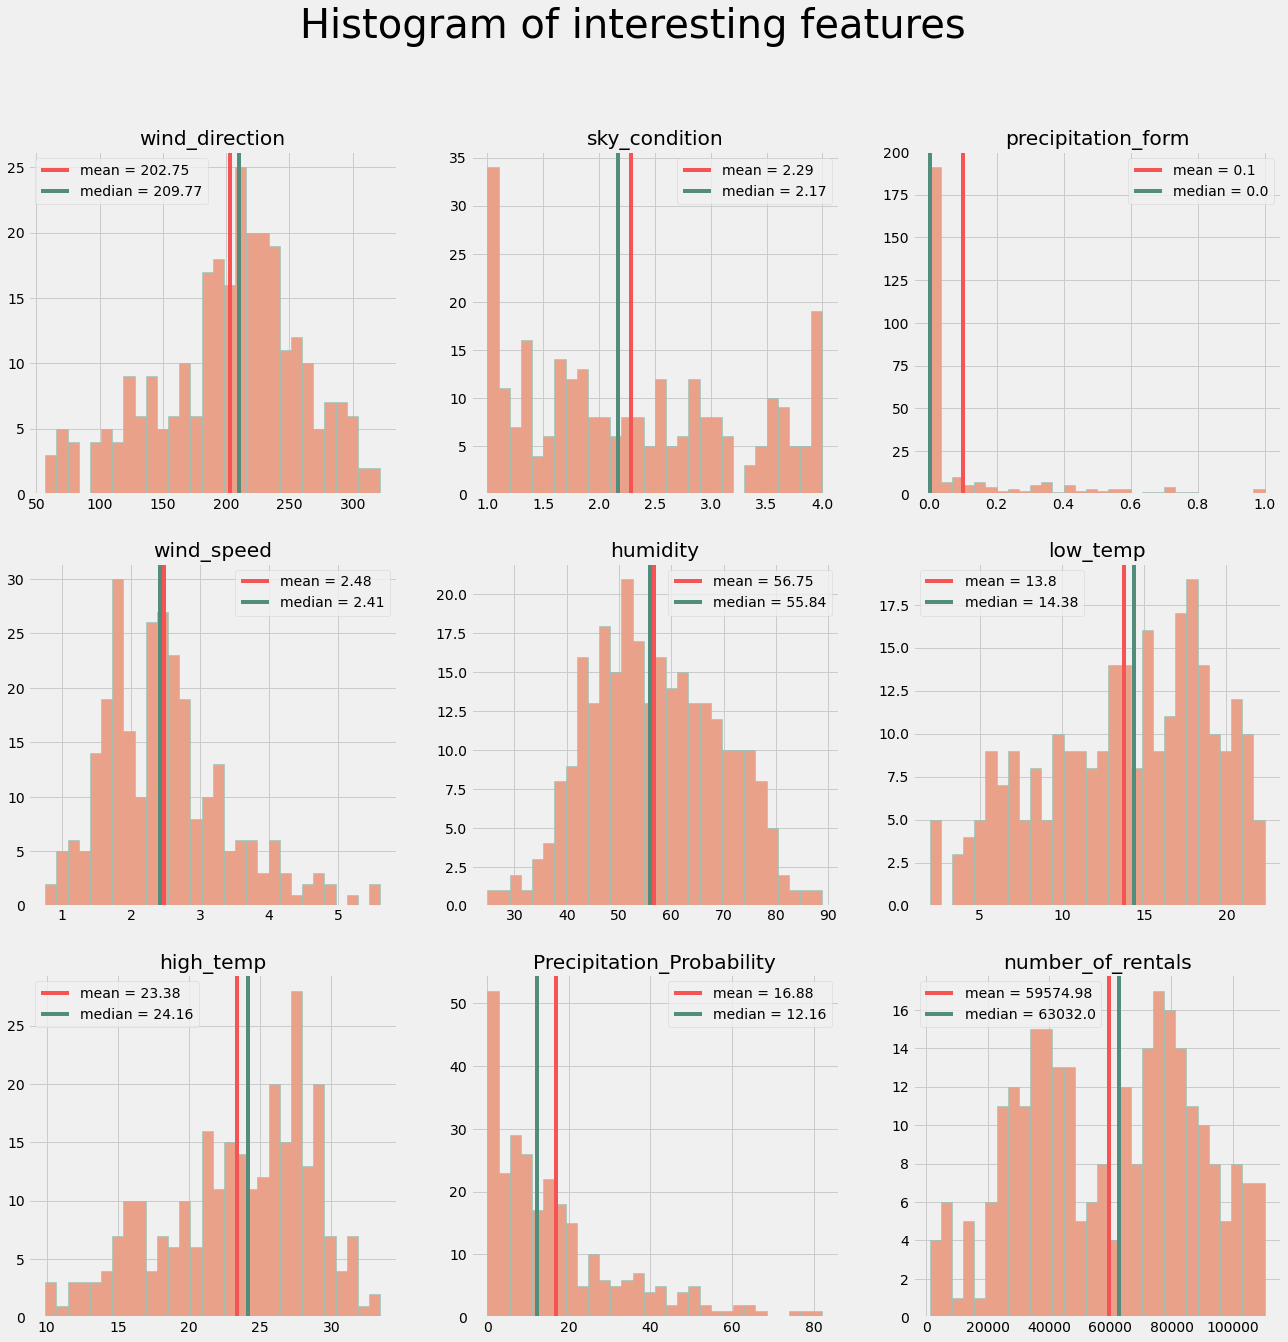

In [8]:
interest_coloumns = ['wind_direction', 'sky_condition', 'precipitation_form', 'wind_speed', 'humidity', 'low_temp', 'high_temp', 'Precipitation_Probability', 'number_of_rentals']

plt.style.use('fivethirtyeight')
fig, ax =plt.subplots(3, 3, figsize = (20, 20))
fig.suptitle('Histogram of interesting features', fontsize=40)

column_idx = 0
for i in range(3):
    for j in range(3):
        ax[i][j].hist(bicycle[interest_coloumns[column_idx]], bins=30, color='#eaa18a', edgecolor='#7bcabf')
        ax[i][j].set_title(interest_coloumns[column_idx])
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[interest_coloumns[column_idx]]['mean'], 2)}")
        ax[i][j].axvline(data_description[interest_coloumns[column_idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[interest_coloumns[column_idx]]['50%'], 2)}")
        ax[i][j].legend()
        column_idx += 1


여러분은 이 그래프들을 보면 어떤 아이디어가 떠오르나요?

하나 재밌는 지표를 발견할 수 있는데요 wind_direction을 살펴보면 평균 202, 가장 분포가 많이 되어있는 값이 200 - 250의 값입니다.

주어진 데이터가 4, 5, 6월의 데이터라는 사실을 떠올려보세요.

4, 5, 6월은 봄이 가고 여름이 오는 시기로 이때는 [양쯔강 기단에 의해 남서풍](http://edu.chosun.com/m/view.html?contid=2014121501005)이 많이 부는 시기입니다.

만약 날짜 데이터가 주어지지 않고 풍향, 습도 등 기상 데이터만 주어졌다면 여러분은 대략 4, 5, 6월의 데이터라고 유추할 수도 있었을 것입니다.

## 요일 표시해보기

우리에게는 날짜 데이터가 주어졌습니다.

하지만 요일이 빠져있네요 날짜로부터 요일을 채워넣어 보겠습니다.

In [9]:
week_day = pd.to_datetime(bicycle['date_time']).dt.day_name()
bicycle['week_day'] = week_day
bicycle.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


## 상관관계 확인하기

정형 데이터 분석에서 중요한 부분은 각 컬럼(feature)간의 상관관계를 알아보는 것입니다.

[상관분석](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)을 통해 어떤 컬럼들이 높은 상관관계를 갖는지 알아보겠습니다.

In [10]:
bicycle_number = bicycle.select_dtypes(np.number) #상관분석은 숫자로 계산할 수 있으므로 데이터에서 숫자로 이루어진 컬럼만을 뽑겠습니다 (date_time drop)

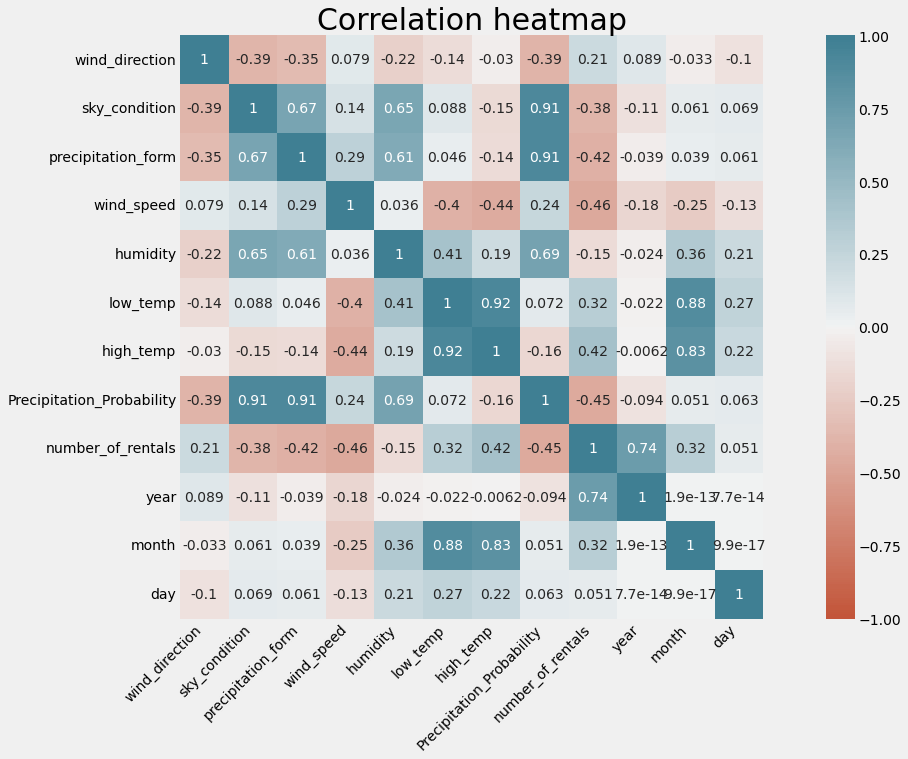

In [11]:
corr = bicycle_number.corr()
plt.figure(figsize=(20, 10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.title('Correlation heatmap', fontsize=30)
plt.show()

feature가 많아서 헷갈리니 중요한 몇 개만 추려서 보겠습니다.

우리가 가장 관심있는 것은 **따릉이 대여량(number_of_rentals)과 어떤 컬럼이 가장 상관관계가 높은가** 입니다.

그래프를 보니 years가 가장 높은 양의 상관관계가 있는것으로 나타났네요!

이는 시간이 지날수록 따릉이 가입자 수가 늘어났기 때문이라고 해석할 수 있겠습니다.

자 그럼 날짜별로 총 대여량이 얼마나 되는지 확인해보겠습니다.

In [12]:
year_rentals = bicycle.groupby('year').sum()['number_of_rentals']
month_rentals = bicycle.groupby('month').sum()['number_of_rentals']
day_rentals = bicycle.groupby('day').sum()['number_of_rentals']

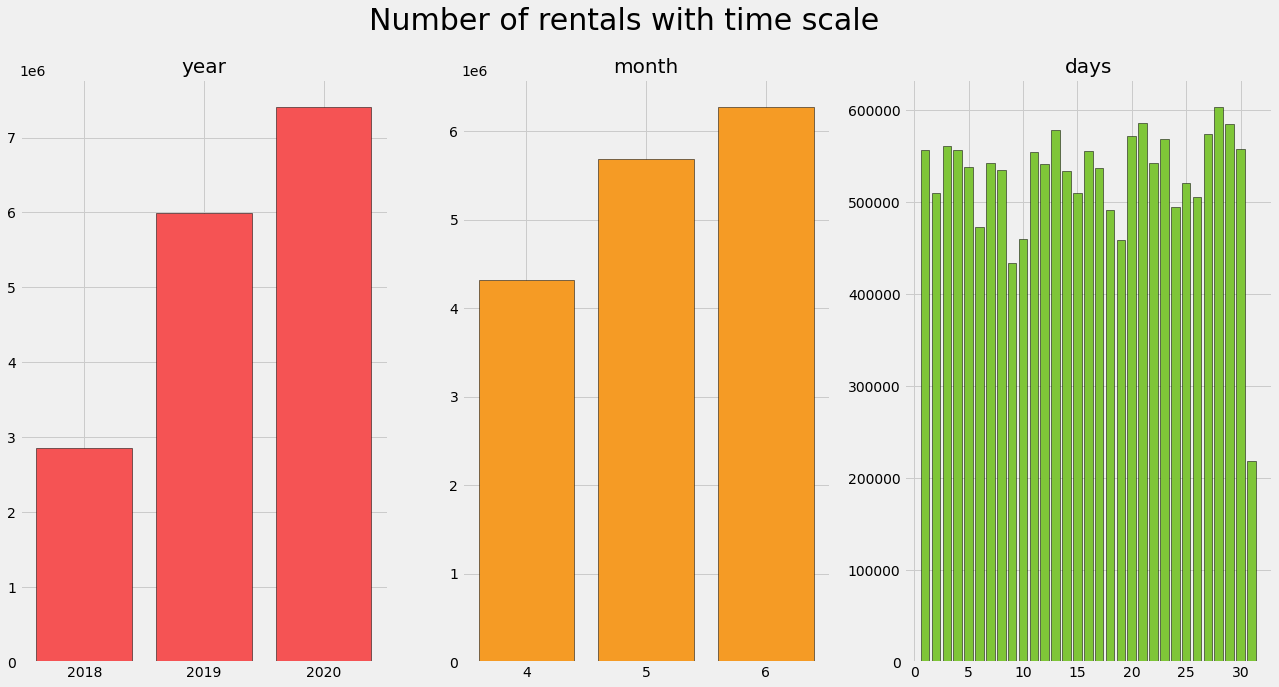

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Number of rentals with time scale', fontsize=30)

ax[0].bar(x=['2018', '2019', '2020'], height=year_rentals, color='#f55354', edgecolor='black')
ax[0].set_title('year', fontsize = 20)

ax[1].bar(x = ['4', '5', '6'], height=month_rentals, color='#f59b25', edgecolor='black')
ax[1].set_title('month', fontsize = 20)

ax[2].bar(x=day_rentals.index.to_list(), height= day_rentals, color='#7fc638', edgecolor='black')
ax[2].set_title('days', fontsize = 20)

plt.show()

예상한대로 해를 거듭할수록 사람들이 따릉이를 더 많이 대여하는 것으로 보입니다.

4월에서 6월로 갈수록 대여량 수가 늘어나는데요 점점 날이 따뜻해지면서 사용자가 많아지기 때문일까요?

일자(ㅇa는 거의 관계가 없는것으로 보입니다.

그렇다면 요일은 어떤 관계가 있을까요??

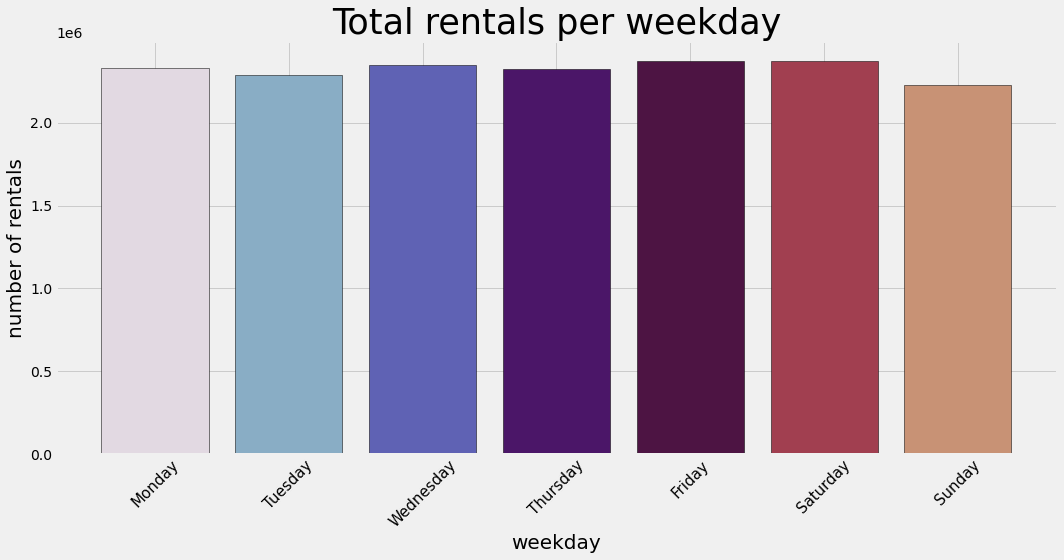

In [14]:
day_table = bicycle.groupby('week_day').sum()
day_table = day_table.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(15, 8))
color_map = plt.get_cmap('twilight')
color_list = [color_map.colors[i] for i in range(0, 512, 72)]
plt.bar(day_table.index, day_table.number_of_rentals, edgecolor='black', color=color_list)
plt.xticks(rotation=45, fontsize=15)
plt.title('Total rentals per weekday', fontsize=35)
plt.xlabel('weekday', fontsize=20)
plt.ylabel('number of rentals', fontsize=20)
plt.tight_layout()
plt.show()

따릉이 대여량은 요일의 영향도 미미한것으로 보입니다.

위의 자료에 대해서 여러분의 생각은 어떠신가요?

여러분은 언제 따릉이를 이용하시나요?

## 강수확률, 하늘상태 산점도

굉장히 높은 상관관계를 보인 강수확률과 하늘상태의 산점도를 그려보고 

점의 크기를 대여량(크면 클수록 대여량이 높음), 색깔로 년도를 구분해보겠습니다.

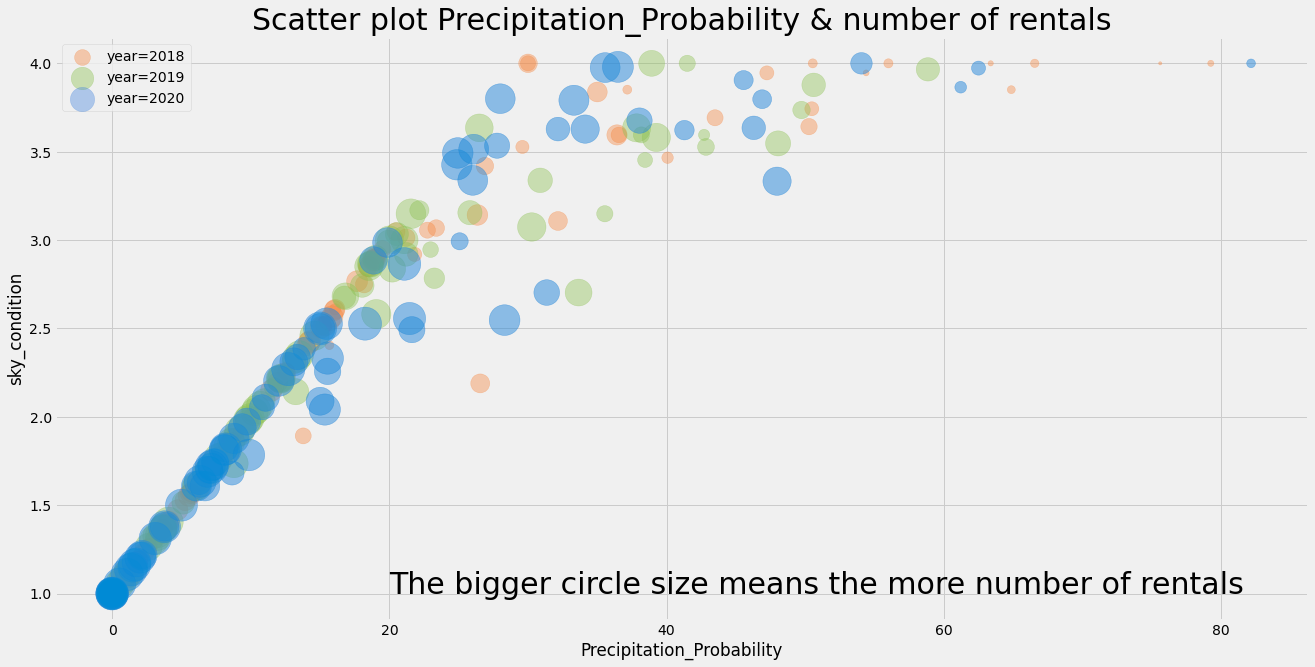

In [15]:
years = [2018, 2019, 2020]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))

for year, color in zip(years, colors):
    
    precipitation_prb = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = bicycle[bicycle['year'] == year].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'year={year}')


plt.scatter(precipitation_prb, sky_condition,s=rentals/100, alpha=0.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 30)
plt.legend()
plt.show()

가장 눈에 띄는건 강수확률이 낮으면 낮을수록 하늘 상태의 값도 낮아진다는점(맑음), 강수 확률이 높을수록 점의 크기가 작아진다는점(대여량이 줄어듦) 등이 있습니다.

이번엔 색깔을 월별로 나누어 보겠습니다.

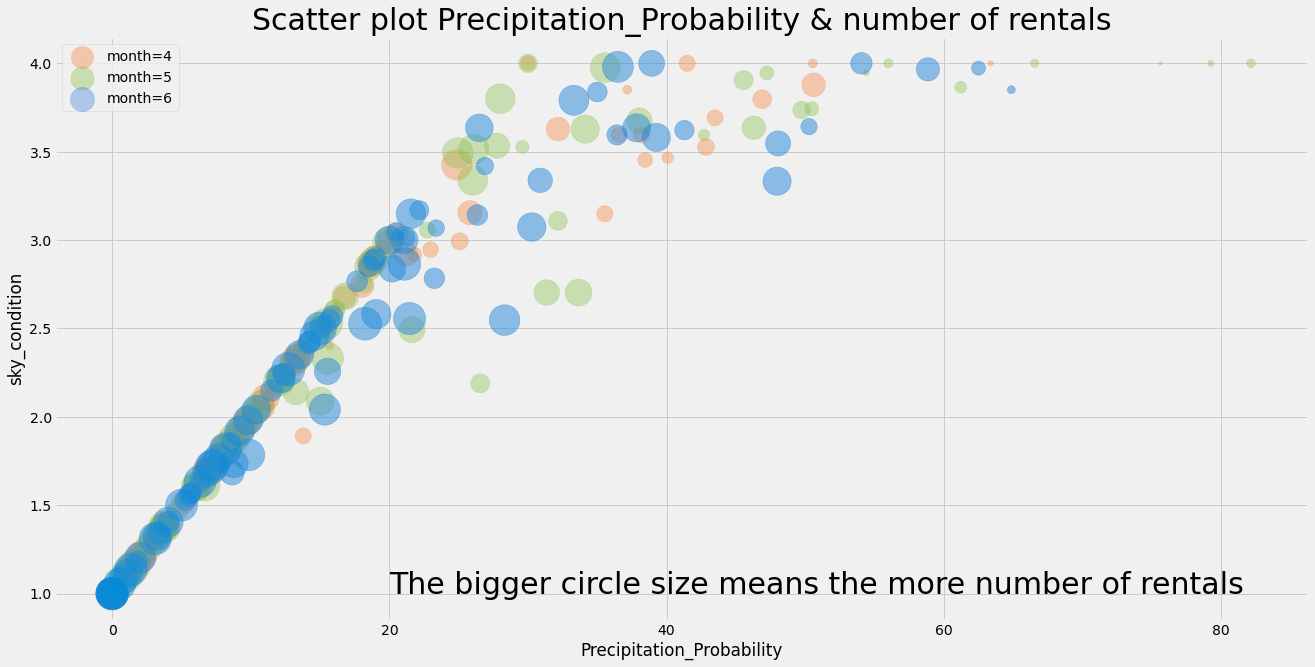

In [16]:
monthes = [4, 5, 6]
colors = ['#f68842', '#8cc152', '#4a89df']

plt.figure(figsize=(20, 10))

for month, color in zip(monthes, colors):
    
    precipitation_prb = bicycle[bicycle['month'] == month].sort_values(by='Precipitation_Probability')['Precipitation_Probability']
    rentals = bicycle[bicycle['month'] == month].sort_values(by='Precipitation_Probability')['number_of_rentals']
    sky_condition = bicycle[bicycle['month'] == month].sort_values(by='Precipitation_Probability')['sky_condition']
    
    plt.scatter(precipitation_prb, sky_condition, s=rentals/100, alpha=0.4, c=color, label=f'month={month}')


plt.scatter(precipitation_prb, sky_condition,s=rentals/100, alpha=0.2)
plt.title('Scatter plot Precipitation_Probability & number of rentals', fontsize=30)
plt.xlabel('Precipitation_Probability')
plt.ylabel('sky_condition')
plt.text(20, 1.0, 'The bigger circle size means the more number of rentals', fontsize= 30)
plt.legend()
plt.show()

그래프를 살펴보니 사람들은 6월에 따릉이를 가장 많이 빌리는 것처럼 보입니다.



이 밖에 또 어떤 인사이트를 찾을 수 있을까요?

여러분은 이번 데이터에서 어떠한 특이점을 볼 수 있었나요?

여러분의 EDA코드를 코드공유에 올려주세요!

좋아요와 댓글을 합산하여 가장 높은 점수를 얻으신 분께 데이콘 후드가 제공됩니다!